# Surto de Sarampo em Pernambuco e no Ceará em 2014

![](https://raw.githubusercontent.com/diascarolina/vacinacao-geral-no-brasil/main/other/banner.jpg?token=AH6WME4BOFRN6LIHPSJL6KDAZVPJW)

# Sumário

- [1 Introdução](#intro)
- [2 Dados](#dados)
- [3 Importação das Bibliotecas & Configurações](#import)
- [4 Limpeza dos Dados](#cleaning)
- [5 Análise do Surto de Sarampo de 2014](#analise)
    - [5.1 Casos de Sarampo de 1990 a 2019 em Pernambuco e no Ceará](#casos)
    - [5.2 Cobertura Vacinal Contra o Sarampo em Pernambuco e no Ceará](#cv)
    - [5.3 Valor Absoluto das Doses Aplicadas contra o Sarampo em Pernambuco e no Ceará](#valor)
    - [5.4 Comparação das Doses Aplicadas e do Número de Casos de Sarampo](#comparacao)
- [6 Conclusão](#conc)
- [7 Referências](#refs)

<a name="intro"></a>
# 1 Introdução

De dezembro de 2013 a outubro de 2015 houve um surto de Sarampo no Brasil. Esse aumento significativo de casos localizou-se, principalmente, nos estados de Pernambuco e Ceará. Tivemos a seguinte quantidade de casos em cada estado:

**Estado** | 2013 | 2014 | 2015
--- | --- | --- | ---
Pernambuco | 200 casos | 24 casos | 0 casos
Ceará | 1 caso | 695 casos | 32 casos

Só com essa tabela já conseguimos identificar que o surto iniciou-se em Pernambuco em 2013 e espalhou-se no Ceará em 2014.

<p align="center">
  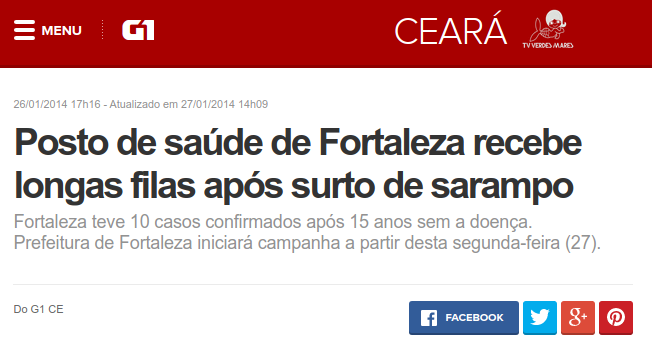
</p>


Metade desses casos foram detectados em menores de 1 ano de vida e a maioria entre pessoas sem esquema vacinal completo.[[1]](http://www.iff.fiocruz.br/index.php/9-noticias/2014/6-aumentosarampo1). Claramente a forma correta de lidar com essa situacão foi intensificar a vacinação, principalmente nas áreas mais afetadas, mas também em todo o país, para evitar que a doença se espalhasse ainda mais. E foi exatamente isso que foi feito e que analisaremos a seguir.

**Mas o que é o Sarampo?**

O sarampo é uma doença infecciosa grave muito comum, principalmente em crianças. Causada pelo _ Morbili Vírus_, essa doença é transmitida por secreções das vias respiratórias, ou seja, pela tosse ou espirro de pessoas infectadas. O período entre o contágio e o aparecimento dos primeiros sintomas é de aproximadamente 12 dias, mas a transmissão pode ocorrer antes mesmo do aparecimenteo dos sintomas iniciais.

Esses sintomas incluem tosse, febre, irritação nos olhos, espirros e coriza, e intenso mal-estar. Em casos mais graves, a febre se agrava e também começam a aparecer as manchas na pele, um dos sintomas mais conhecidos da doença.[[2]](https://www.saude.pr.gov.br/Pagina/Sarampo)

**Vacinas contra o Sarampo**

Existe mais de uma vacina que protegem contra o sarampo, cada uma aplicada em situações ou períodos específicos do calendário vacinal, de acordo com a idade ou situação do cartão de vacina individual. Cabe ao profissional da saúde analisar qual a mais adequada para ser aplicada. Essas são:
- **Dupla viral:** protege do vírus do sarampo e da rubéola. Pode ser utilizada para o bloqueio vacinal em situação de surto;
- **Tríplice viral:** protege do vírus do sarampo, caxumba e rubéola;
- **Tetra viral:** protege do vírus do sarampo, caxumba, rubéola e varicela (catapora).

<div class="alert alert-success">
    <strong>Clique <a href="https://github.com/diascarolina/vacinacao-geral-no-brasil/blob/main/notebooks/vacinacao_geral_no_brasil.ipynb">aqui</a> para retornar à Parte 1, na qual faço um panorama geral da vacinação no Brasil.</strong>
</div>

<a name="dados"></a>
# 2 Dados

Aqui fizemos a mesma obtenção de dados que na [**Parte 1**](https://github.com/diascarolina/vacinacao-geral-no-brasil/blob/main/notebooks/vacinacao_geral_no_brasil.ipynb) da análise, no próprio site do [DATASUS/TABNET](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def). As mudanças mais relevantes foram no tipo de imunizante escolhido e nos estados selecionados.

Para os imunizantes foram selecionados os que protegem contra o sarampo, a saber:

<p align="center">
  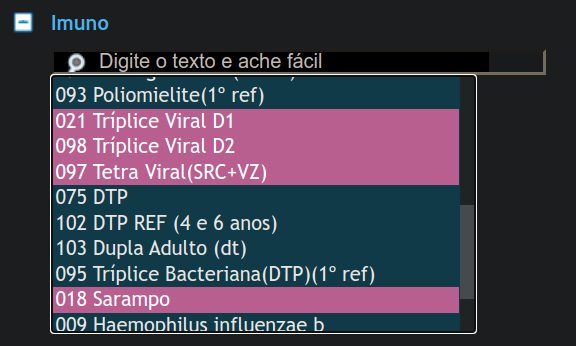
</p>

E no estados, como era de se esperar, foram selecionados Pernambuco e Ceará.

<a name="import"></a>
# 3 Importação das Bibliotecas & Configurações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

In [2]:
# formatar os números para mostrarem duas casa decimais
pd.options.display.float_format = '{:.2f}'.format

# configurações de cores
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configurações da fonte utilizada nos gráficos
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'

<a name="cleaning"></a>
# 4 Limpeza dos Dados

Por questões de tamanho e organização, a parte de limpeza dos datasets foi realizada em um outro notebook linkado a seguir:

<div class="alert alert-success">
    <strong><a href="https://github.com/diascarolina/vacinacao-geral-no-brasil/blob/main/notebooks/limpeza_dados.ipynb">Notebook com a limpeza dos dados.</a></strong>
</div>

Cada arquivo _.csv_ com os dados brutos utilizados foi tratado no notebook acima e salvo uma nova versão com os dados limpos que são os dados importados no notebook atual.

<a name="analise"></a>
# 5 Análise do Surto de Sarampo de 2014

Como dito anteriormente, para realizarmos nossas análises utilizaremos os dados de casos de Sarampo em Pernambuco e no Ceará, além dos dados de Cobertura Vacinal e de números absolutos dos imunizantes aplicados contra o sarampo, a saber, as vacinas dupla, tríplice e tetra viral.

Antes disso, podemos levantar algumas hipóteses para nos ajudar a seguir por um caminho nos dados.

- **Hipótese 1:** Antes do surto de sarampo iniciado em 2013, a cobertura vacinal de imunizantes contra o sarampo estava relativamente baixa a vários anos.
- **Hipótese 2:** Durante o surto de sarampo, de 2013 a 2015, a quantidade de vacinas aplicadas contra o sarampo aumentou bastante nos dois estados analisados e, como consequência, os casos diminuíram.

<a name="casos"></a>
## 5.1 Casos de Sarampo de 1990 a 2019 em Pernambuco e no Ceará

In [3]:
# importação do dataset já tratado
casos_sarampo = pd.read_csv('../dados/clean/casos_sarampo.csv')

In [4]:
casos_sarampo

,Estado,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Pernambuco,194,290,165,15,13,10,23,335,345,...,1,0,1,200,24,0,0,0,4,268
1,Ceará,2771,4704,393,134,87,37,125,864,29,...,0,0,0,1,695,32,0,0,0,15


In [5]:
casos_sarampo = casos_sarampo.set_index('Estado').rename_axis(None)

**Graficamente para o Estado de Pernambuco:**

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


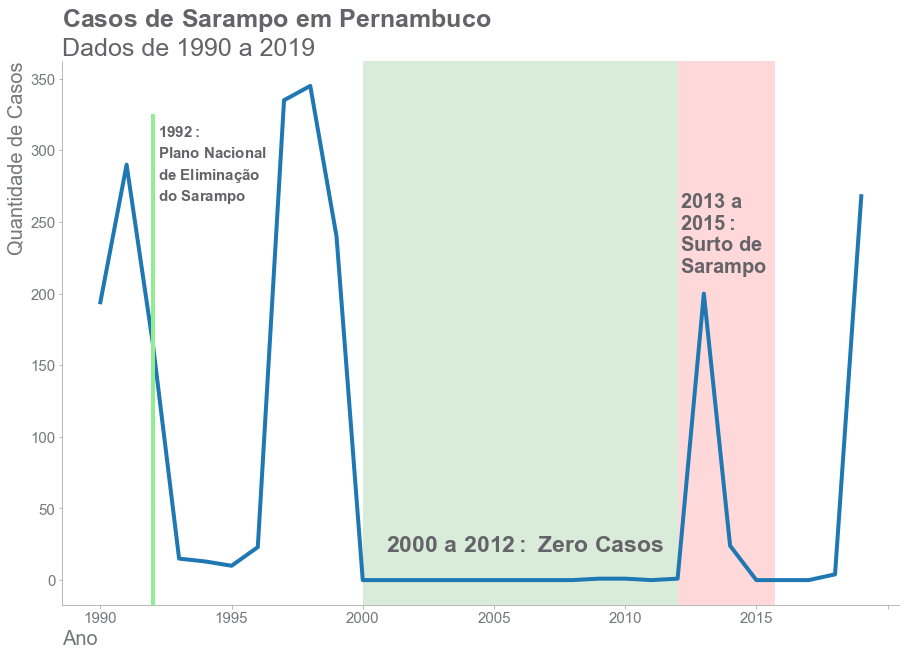

In [6]:
ax = casos_sarampo.loc['Pernambuco'].T.plot(figsize = (15, 10), linewidth = 4)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.title('$\\bf{Casos\ de\ Sarampo\ em\ Pernambuco}$\nDados de 1990 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Quantidade de Casos', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

plt.axvline(x = 2, ymax = 0.9, color = 'lightgreen', linewidth = 4)
plt.text(2.2, 310, '$\\bf{1992:}$', fontsize = 15, color = GRAY4)
plt.text(2.2, 295, '$\\bf{Plano\ Nacional}$', fontsize = 15, color = GRAY4)
plt.text(2.2, 280, '$\\bf{de\ Eliminação}$', fontsize = 15, color = GRAY4)
plt.text(2.2, 265, '$\\bf{do\ Sarampo}$', fontsize = 15, color = GRAY4)

plt.axvspan(10, 22, facecolor = 'g', alpha = 0.15)
plt.text(10.9, 20, '$\\bf{2000\ a\ 2012:\ Zero\ Casos}$', fontsize = 23, color = GRAY4)

plt.axvspan(22, 25.7, facecolor = 'r', alpha = 0.15)
plt.text(22.1, 260, '$\\bf{2013\ a}$', fontsize = 20, color = GRAY4)
plt.text(22.1, 245, '$\\bf{2015:}$', fontsize = 20, color = GRAY4)
plt.text(22.1, 230, '$\\bf{Surto\ de}$', fontsize = 20, color = GRAY4)
plt.text(22.1, 215, '$\\bf{Sarampo}$', fontsize = 20, color = GRAY4)

plt.show()

Fica claro nesse gráfico os períodos em que ocorreram surtos da doença em Pernambuco, como em 1991, de 1996 até 1999 e o de 2013 a 2015. Como estamos nos focando neste último, o destacamos. Também há um aumento no número de casos a partir de 2019.

**Graficamente para o Estado do Ceará:**

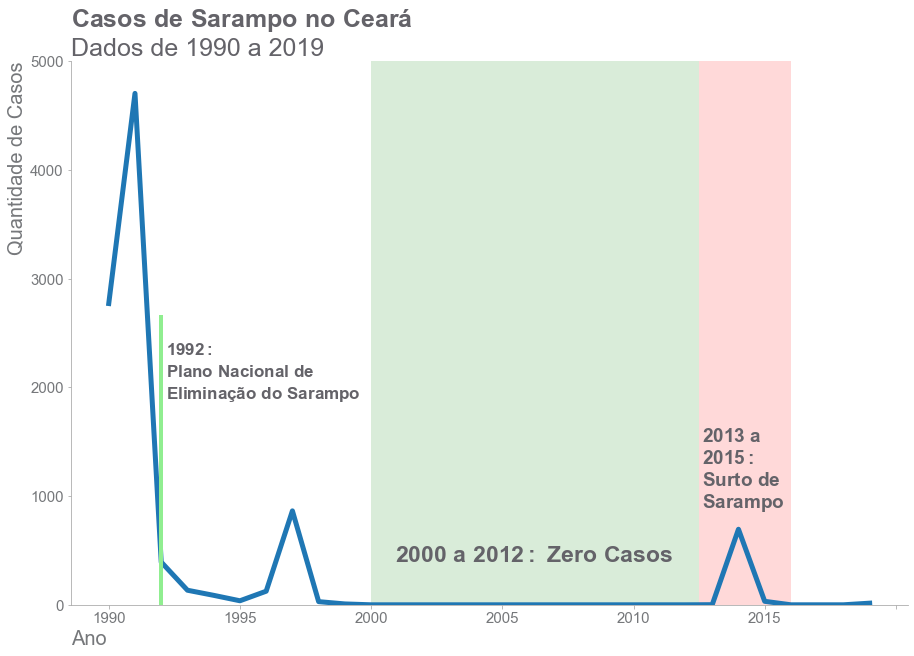

In [7]:
ax = casos_sarampo.loc['Ceará'].T.plot(figsize = (15, 10), linewidth = 5)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)
    
plt.ylim(0, 5000)

plt.title('$\\bf{Casos\ de\ Sarampo\ no\ Ceará}$\nDados de 1990 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Quantidade de Casos', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

plt.axvline(x = 2, ymax = 0.53, color = 'lightgreen', linewidth = 4)
plt.text(2.2, 2300, '$\\bf{1992:}$', fontsize = 17, color = GRAY4)
plt.text(2.2, 2100, '$\\bf{Plano\ Nacional\ de}$', fontsize = 17, color = GRAY4)
plt.text(2.2, 1900, '$\\bf{Eliminação\ do\ Sarampo}$', fontsize = 17, color = GRAY4)

plt.axvspan(10, 22.5, facecolor = 'g', alpha = 0.15)
plt.text(10.9, 400, '$\\bf{2000\ a\ 2012:\ Zero\ Casos}$', fontsize = 23, color = GRAY4)

plt.axvspan(22.5, 26, facecolor = 'r', alpha = 0.15)
plt.text(22.6, 1500, '$\\bf{2013\ a}$', fontsize = 19, color = GRAY4)
plt.text(22.6, 1300, '$\\bf{2015:}$', fontsize = 19, color = GRAY4)
plt.text(22.6, 1100, '$\\bf{Surto\ de}$', fontsize = 19, color = GRAY4)
plt.text(22.6, 900, '$\\bf{Sarampo}$', fontsize = 19, color = GRAY4)

plt.show()

Para uma visualização mais precisa, vamos analisar o gráfico iniciando no ano de 1994, mesmo ano no qual faremos as comparações com os imunizantes. Isso será feito para termos uma melhor escala no gráfico, já que a partir dos anos 90 tivemos valores bastante elevados no número de casos de sarampo no Ceará, chegando a quase 5 mil casos em 1991.

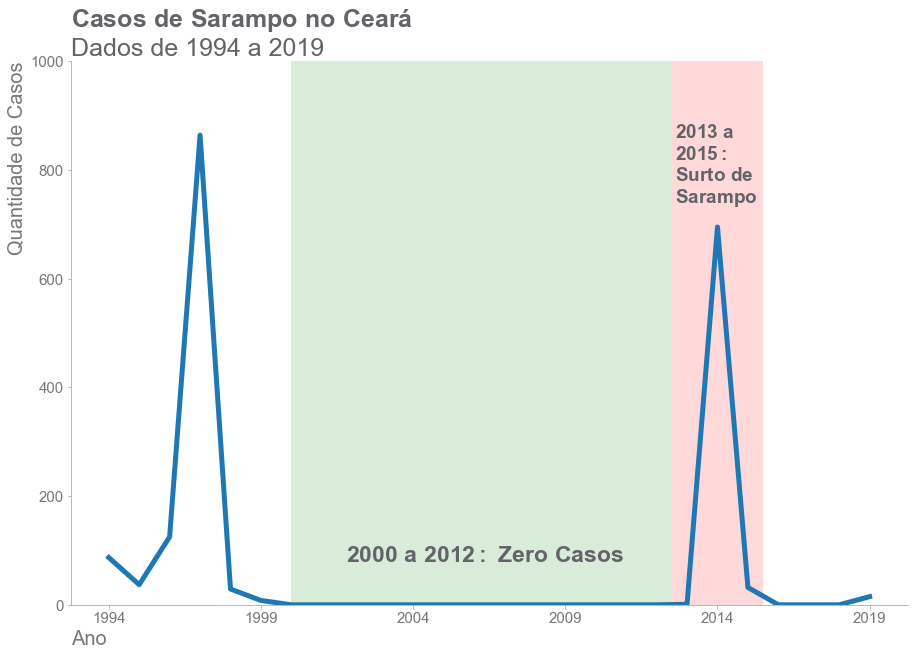

In [8]:
ax = casos_sarampo.loc['Ceará'][4:].T.plot(figsize = (15, 10), linewidth = 5)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.ylim(0, 1000)
plt.title('$\\bf{Casos\ de\ Sarampo\ no\ Ceará}$\nDados de 1994 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Quantidade de Casos', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

plt.axvspan(6, 18.5, facecolor = 'g', alpha = 0.15)
plt.text(7.8, 80, '$\\bf{2000\ a\ 2012:\ Zero\ Casos}$', fontsize = 23, color = GRAY4)

plt.axvspan(18.5, 21.5, facecolor = 'r', alpha = 0.15)
plt.text(18.6, 860, '$\\bf{2013\ a}$', fontsize = 19, color = GRAY4)
plt.text(18.6, 820, '$\\bf{2015:}$', fontsize = 19, color = GRAY4)
plt.text(18.6, 780, '$\\bf{Surto\ de}$', fontsize = 19, color = GRAY4)
plt.text(18.6, 740, '$\\bf{Sarampo}$', fontsize = 19, color = GRAY4)

plt.show()

Agora temos uma melhor visão do períodos de surtos de sarampo no Ceará. Um de 1996 a 1998, e o que estamos analisando, de 2013 a 2015.

<a name="cv"></a>
## 5.2 Cobertura Vacinal Contra o Sarampo em Pernambuco e no Ceará

In [9]:
# importação do dataset já tratado
cob_vac = pd.read_csv('../dados/clean/cob_vac.csv')

In [10]:
cob_vac.head()

,Ano,Ceará,Pernambuco,Total
0,1994,100.00,73.31,87.84
1,1995,100.00,100.00,100.00
2,1996,98.43,87.24,92.71
3,1997,100.00,100.00,100.00
4,1998,90.77,100.00,100.00


In [11]:
cobertura_vacina = cob_vac.set_index('Ano').rename_axis(None)

**Graficamente para o Estado de Pernambuco:**

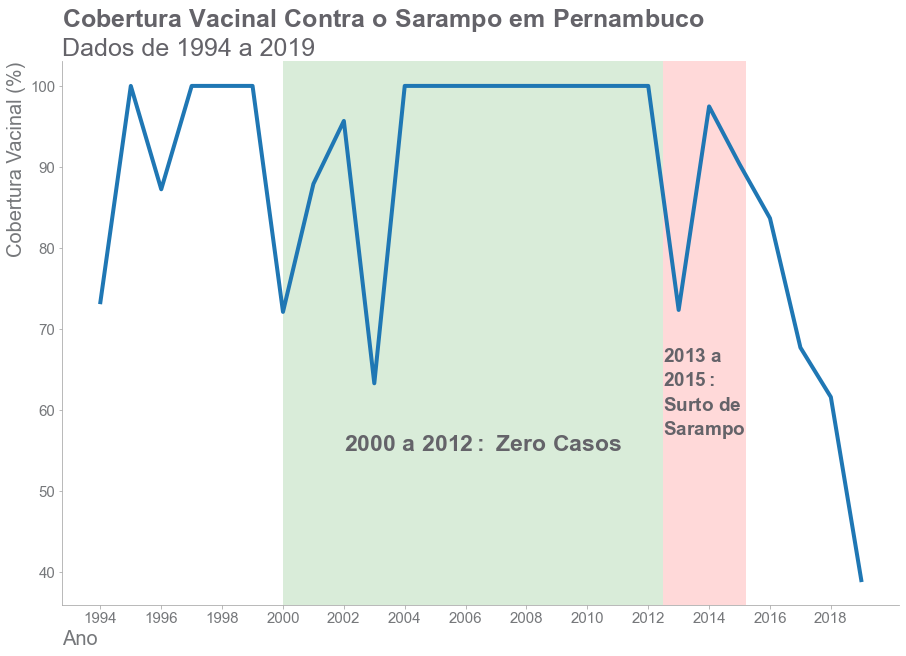

In [12]:
ax = cobertura_vacina['Pernambuco'].plot(figsize = (15, 10), linewidth = 4)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)
    
plt.xticks(range(1994, 2020, 2))

plt.title('$\\bf{Cobertura\ Vacinal\ Contra\ o\ Sarampo\ em\ Pernambuco}$\nDados de 1994 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (%)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

plt.axvspan(2000, 2012.5, facecolor = 'g', alpha = 0.15)
plt.text(2002, 55, '$\\bf{2000\ a\ 2012:\ Zero\ Casos}$', fontsize = 23, color = GRAY4)

plt.axvspan(2012.5, 2015.2, facecolor = 'r', alpha = 0.15)
plt.text(2012.5, 66, '$\\bf{2013\ a}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 63, '$\\bf{2015:}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 60, '$\\bf{Surto\ de}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 57, '$\\bf{Sarampo}$', fontsize = 19, color = GRAY4)

plt.show()

Aqui vemos que mesmo antes do período em que ocorreu o surto de sarampo, a cobertura vacinal era de 100%, mas que teve um declínio no início desse surto, o que pode ter levado à doença a ter se espalhado na região, antes de obtermos uma nova cobertura vacinal alta e controlar o surto.

**Graficamente para o Estado do Ceará:**

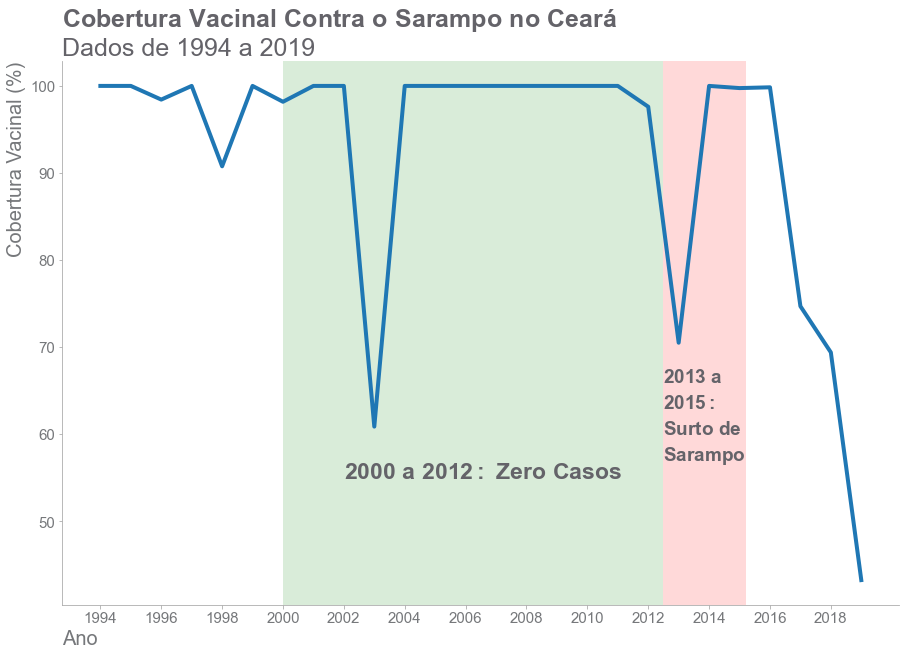

In [13]:
ax = cobertura_vacina['Ceará'].plot(figsize = (15, 10), linewidth = 4)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)
    
plt.xticks(range(1994, 2020, 2))

plt.title('$\\bf{Cobertura\ Vacinal\ Contra\ o\ Sarampo\ no\ Ceará}$\nDados de 1994 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (%)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

plt.axvspan(2000, 2012.5, facecolor = 'g', alpha = 0.15)
plt.text(2002, 55, '$\\bf{2000\ a\ 2012:\ Zero\ Casos}$', fontsize = 23, color = GRAY4)

plt.axvspan(2012.5, 2015.2, facecolor = 'r', alpha = 0.15)
plt.text(2012.5, 66, '$\\bf{2013\ a}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 63, '$\\bf{2015:}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 60, '$\\bf{Surto\ de}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 57, '$\\bf{Sarampo}$', fontsize = 19, color = GRAY4)

plt.show()

Aqui ocorre exatamente a mesma situação que occorreu em Pernambuco, a cobertura vacinal teve diminuição no período anterior ao surto, permitindo que a doença se espalhasse. Como medida de combate ao surto, a cobertura vacinal aumentou e o surto foi controlado. 

Isso já nos ajudar com a nossa primeira hipótese de que:
> Antes do surto de sarampo iniciado em 2013, a cobertura vacinal de imunizantes contra o sarampo estava relativamente baixa a vários anos.

Isso não é verdade, estavamos com um longo período de cobertura vacinal a 100%, mas bastou um único ano com cobertura vacinal abaixo de 95% para que a doença se alastrasse pelos estados analisados.

Mas me parece que analisarmos pela Cobertura Vacinal não é a melhor opção para enxergarmos uma comparação com os casos de sarampo. Uma melhor opção seria olharmos para a quantidade de doses aplicadas.

**Será que a quantidade de doses aplicadas de imunizantes contra o sarampo aumenta em período onde ocorrem surtos da doença?**

<a name="valor"></a>
## 5.3 Valor Absoluto das Doses Aplicadas de Vacinas contra o Sarampo em Pernambuco e no Ceará

In [14]:
# importação do dataset já tratado
quant_vac = pd.read_csv('../dados/clean/quant_vac.csv')

**Graficamente para o Estado de Pernambuco:**

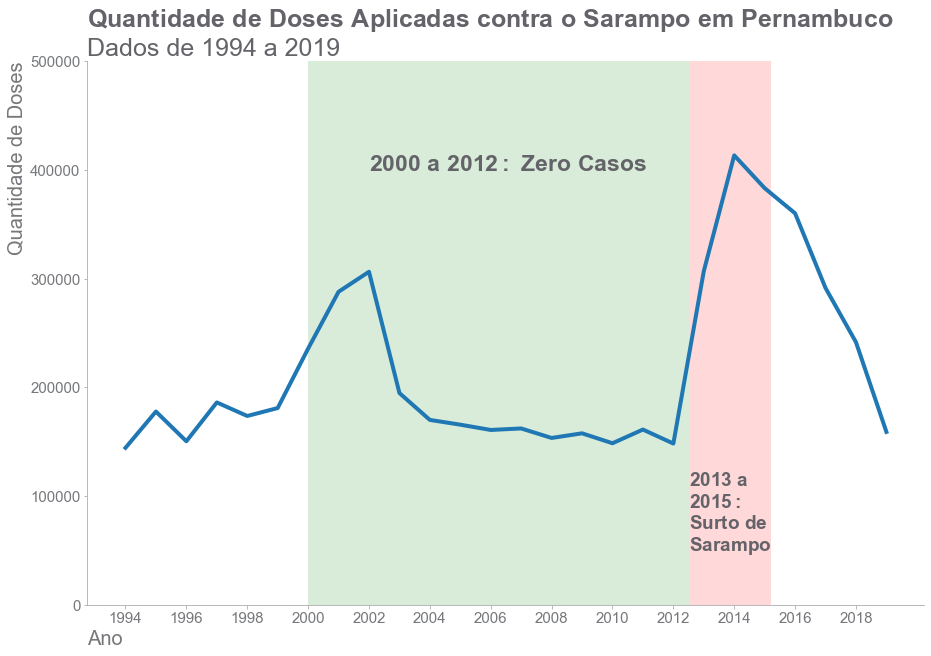

In [15]:
ax = quant_vac.set_index('Ano')['Pernambuco'].plot(figsize = (15, 10), linewidth = 4)

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.ylim(0, 500000)
plt.xticks(range(1994, 2020, 2))

plt.title('$\\bf{Quantidade\ de\ Doses\ Aplicadas\ contra\ o\ Sarampo\ em\ Pernambuco}$\nDados de 1994 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Quantidade de Doses', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

plt.axvspan(2000, 2012.5, facecolor = 'g', alpha = 0.15)
plt.text(2002, 400000, '$\\bf{2000\ a\ 2012:\ Zero\ Casos}$', fontsize = 23, color = GRAY4)

plt.axvspan(2012.5, 2015.2, facecolor = 'r', alpha = 0.15)
plt.text(2012.5, 110000, '$\\bf{2013\ a}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 90000, '$\\bf{2015:}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 70000, '$\\bf{Surto\ de}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 50000, '$\\bf{Sarampo}$', fontsize = 19, color = GRAY4)    

plt.show()

**Graficamente para o Estado do Ceará:**

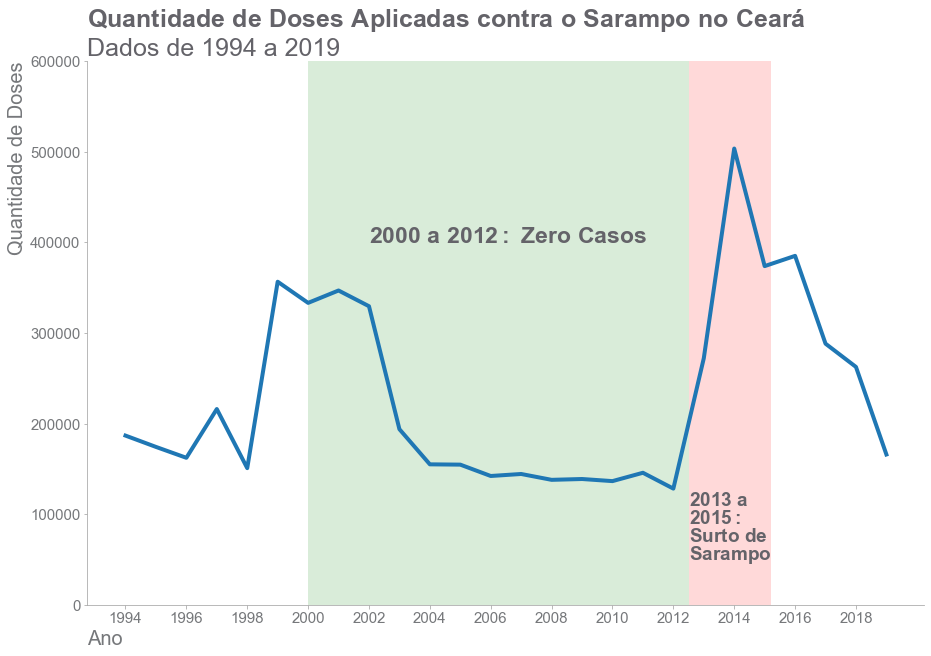

In [16]:
ax = quant_vac.set_index('Ano')['Ceará'].plot(figsize = (15, 10), linewidth = 4)

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.ylim(0, 600000)
plt.xticks(range(1994, 2020, 2))

plt.title('$\\bf{Quantidade\ de\ Doses\ Aplicadas\ contra\ o\ Sarampo\ no\ Ceará}$\nDados de 1994 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Quantidade de Doses', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

plt.axvspan(2000, 2012.5, facecolor = 'g', alpha = 0.15)
plt.text(2002, 400000, '$\\bf{2000\ a\ 2012:\ Zero\ Casos}$', fontsize = 23, color = GRAY4)

plt.axvspan(2012.5, 2015.2, facecolor = 'r', alpha = 0.15)
plt.text(2012.5, 110000, '$\\bf{2013\ a}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 90000, '$\\bf{2015:}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 70000, '$\\bf{Surto\ de}$', fontsize = 19, color = GRAY4)
plt.text(2012.5, 50000, '$\\bf{Sarampo}$', fontsize = 19, color = GRAY4)    

plt.show()

Agora sim podemos ver uma melhor tendência ao utilizar a quantidade de doses aplicadas. Fica claro que houve um aumento substancial no número de doses aplicadas em Pernambuco e no Ceará no período de 2013 a 2015, no qual ocorreu o surto de sarampo nesses estados.

Também é evidente que essas aplicações dos imunizantes ocorreram de forma bastante acelerada. Vejamos quantas doses foram aplicadas no ápice do surto em cada estado, no ano de 2014.

In [17]:
quant_vac = quant_vac.set_index('Ano').rename_axis(None)

In [18]:
print('\tEm 2014 foram aplicadas {:,} doses de imunizantes contra o Sarampo em Pernambuco e\n\
        {:,} doses no Ceará.'.format(quant_vac.loc[2014]['Pernambuco'], quant_vac.loc[2014]['Ceará']).replace(',', '.'))

	Em 2014 foram aplicadas 413.394 doses de imunizantes contra o Sarampo em Pernambuco e
        503.619 doses no Ceará.


In [19]:
print('\tA média de doses aplicadas contra o Sarampo entre 1994 e 2019 em Pernambuco foi de {:,.0f}\n\
        e no Ceará a média foi de {:,.0f} doses.'.format(quant_vac['Pernambuco'].mean(), quant_vac['Ceará'].mean()).replace(',', '.'))

	A média de doses aplicadas contra o Sarampo entre 1994 e 2019 em Pernambuco foi de 216.214
        e no Ceará a média foi de 230.200 doses.


Com essas informações fica claro que o número de doses aplicadas de imunizantes contra o Sarampo foi mais do que duas vezes a média nos dois estados analisados entre 1994 e 2019.

<a name="comparacao"></a>
## 5.4 Comparação das Doses Aplicados e do Número de Casos de Sarampo

In [20]:
# melhorando os datasets e deixando ambos com o mesmo período de 1994 a 2019
casos_sarampo = casos_sarampo.T
casos_sarampo = casos_sarampo.drop(['1990', '1991', '1992', '1993'], axis = 0)
casos_sarampo.index = casos_sarampo.index.astype(int)
quant_vac = quant_vac.drop('Total', axis = 1)

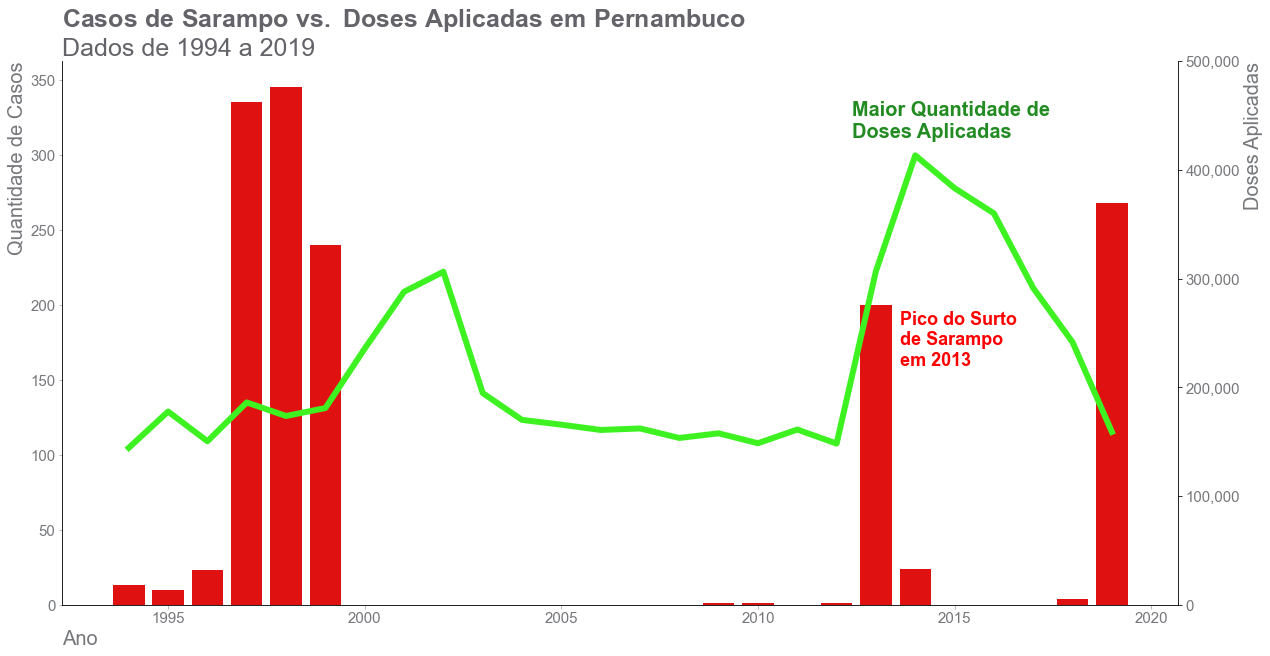

In [21]:
fig, axes = plt.subplots(figsize = (20, 10))

plt.title('$\\bf{Casos\ de\ Sarampo\ vs.\ Doses\ Aplicadas\ em\ Pernambuco}$\nDados de 1994 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)

plt.bar(x = casos_sarampo.index, height = casos_sarampo['Pernambuco'], color = '#E01111')
axes.set_xlabel('Ano', fontdict = {'fontsize': 20}, loc = 'left', color = GRAY5)
axes.set_ylabel('Quantidade de Casos', fontdict = {'fontsize': 20}, loc = 'top', color = GRAY5)

axes2 = axes.twinx()
quant_vac['Pernambuco'].T.plot(linewidth = 6, color = '#3EF222')
axes2.set_ylabel('Doses Aplicadas', fontdict = {'fontsize': 20}, loc = 'top', color = GRAY5)
axes2.set_ylim(0, 350)
axes2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes2.set_ylim(0, 500000)

axes.tick_params(color = 'darkgrey', bottom = 'off')
axes.spines['bottom'].set_color('darkgrey')
axes.spines['left'].set_color('darkgrey')
axes.spines['right'].set_color('darkgrey')
axes.spines['top'].set_visible(False)
axes2.spines['top'].set_visible(False)

for i in axes.get_yticklabels() + axes.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)
for i in axes2.get_yticklabels() + axes2.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.text(2012.4, 430000, 'Maior Quantidade de\nDoses Aplicadas', fontsize = 20, color = 'forestgreen', fontweight = 'bold')
plt.text(2013.6, 220000, 'Pico do Surto\nde Sarampo\nem 2013', fontsize = 18, color = 'r', fontweight = 'bold')

plt.show()

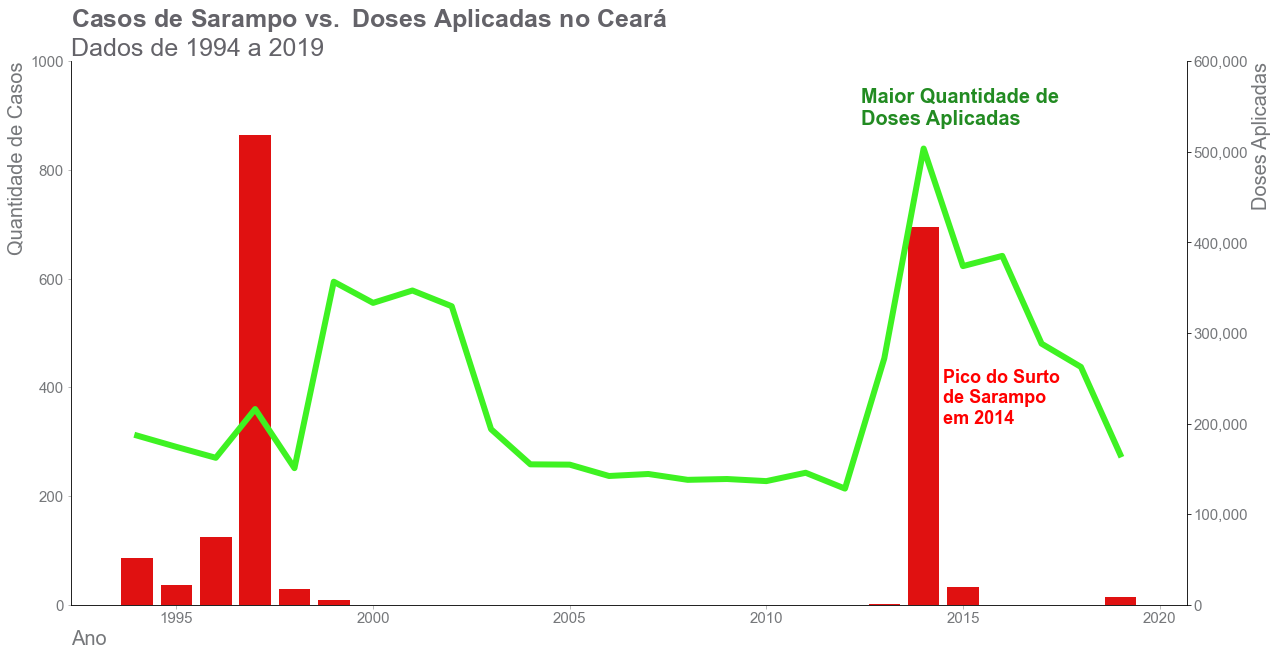

In [22]:
fig, axes = plt.subplots(figsize = (20, 10))

plt.title('$\\bf{Casos\ de\ Sarampo\ vs.\ Doses\ Aplicadas\ no\ Ceará}$\nDados de 1994 a 2019',
          loc = 'left', fontsize = 25, color = GRAY4)

plt.bar(x = casos_sarampo.index, height = casos_sarampo['Ceará'], color = '#E01111')
axes.set_xlabel('Ano', fontdict = {'fontsize': 20}, loc = 'left', color = GRAY5)
axes.set_ylabel('Quantidade de Casos', fontdict = {'fontsize': 20}, loc = 'top', color = GRAY5)
axes.set_ylim(0, 1000)

axes2 = axes.twinx()
quant_vac['Ceará'].T.plot(linewidth = 6, color = '#3EF222')
axes2.set_ylabel('Doses Aplicadas', fontdict = {'fontsize': 20}, loc = 'top', color = GRAY5)

axes2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes2.set_ylim(0, 600000)

axes.tick_params(color = 'darkgrey', bottom = 'off')
axes.spines['bottom'].set_color('darkgrey')
axes.spines['left'].set_color('darkgrey')
axes.spines['right'].set_color('darkgrey')
axes.spines['top'].set_visible(False)
axes2.spines['top'].set_visible(False)

for i in axes.get_yticklabels() + axes.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)
for i in axes2.get_yticklabels() + axes2.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.text(2012.4, 530000, 'Maior Quantidade de\nDoses Aplicadas', fontsize = 20, color = 'forestgreen', fontweight = 'bold')
plt.text(2014.5, 200000, 'Pico do Surto\nde Sarampo\nem 2014', fontsize = 18, color = 'r', fontweight = 'bold')

plt.show()

O efeito das vacinas contra o sarampo utilizadas no Brasil inicia-se a partir de duas semanas[[3]](https://www.uol.com.br/vivabem/noticias/redacao/2019/07/10/10-perguntas-e-respostas-sobre-a-vacina-do-sarampo.htm)[[4]](https://www.tuasaude.com/vacina-triplice-viral/), então, na escala de tempo, esse efeito é quase imediato e isso pode ser visto claramente através dos dois gráficos anteriores. Logo após termos um aumento expressivo na quantidade de doses de imunizantes aplicados contra o sarampo, os casos confirmados durante o surto de sarampo diminuíram drasticamente até serem zerados por completo.

Baseando-se pelas Coberturas Vacinais, no mesmo período também foi atingido mais de 95% dessa cobertura. Ou seja, mais de 95% das pessoas que faziam parte do público alvo receberam a aplicação das vacinas e estavam potencialmente imunizadas.[[5]](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf) Esse foi o fator determinante para o controle e dizimação do surto ocorrido em 2013 e 2014 em Pernambuco e no Ceará.

Analisamos apenas esse período já citado, que vai do fim de 2013 até o início de 2015. Mas também poderíamos citar os períodos de 1997 a 1999, que também tiveram um aumento expressivo de casos e, mais atualmente, o período a partir de 2018 que vem também enfrentando uma alta nos casos de sarampo, [a maior desde 1999](https://www.folhape.com.br/noticias/casos-de-sarampo-no-pais-ultrapassam-recorde-de-1999/76664/).

Com isso, chegamos à nossa hipótese 2:
> Durante o surto de sarampo, de 2013 a 2015, a quantidade de vacinas aplicadas contra o sarampo aumentou bastante nos dois estados analisados e, como consequência, os casos diminuíram.

Verdade, como pode ser visto claramente nos dois gráficos anteriores. Aumentando a quantidade de doses aplicadas e, consequentemente, a cobertura vacina, o surto foi controlado e os dois estados e o Brasil se viu novamente livre da doença:
- [Eliminação do sarampo no Brasil tem anúncio internacional](https://portal.fiocruz.br/noticia/eliminacao-do-sarampo-no-brasil-tem-anuncio-internacional)

<a name="conc"></a>
# 6 Conclusão

Vimos que no período de 2013 a 2015 dois estados brasileiros sofreram com um surto de sarampo após não registrarem nenhum caso a quae 15 anos. Esses estados foram Pernambuco e Ceará. Tivemos a seguintes distruibuição de casos:

**Estado** | 2013 | 2014 | 2015
--- | --- | --- | ---
**Pernambuco** | 200 casos | 24 casos | 0 casos
**Ceará** | 1 caso | 695 casos | 32 casos

Nesse período, se intensificaram as ações de combate à doença, aumentando a cobertura vacinal e a quantidade de doses aplicadas de vacinas contra o sarampo.

Em 2014 foram aplicadas 413.394 doses de imunizantes contra o Sarampo em Pernambuco e 503.619 doses no Ceará.

A média de doses aplicadas contra o Sarampo entre 1994 e 2019 em Pernambuco foi de 216.214 e no Ceará a média foi de 230.200 doses.

Com essas informações fica claro que o número de doses aplicadas de imunizantes contra o sarampo no ano de 2014, pico no número de doses, foi mais do que duas vezes a média nos dois estados analisados entre 1994 e 2019.


Consequimos analisar também duas hipóteses:

- **Hipótese 1:** Antes do surto de sarampo iniciado em 2013, a cobertura vacinal de imunizantes contra o sarampo estava relativamente baixa a vários anos.

> Isso não é verdade, estavamos com um longo período de cobertura vacinal a 100%, mas bastou um único ano com cobertura vacinal abaixo de 95% para que a doença se alastrasse pelos estados analisados.


- **Hipótese 2:** Durante o surto de sarampo, de 2013 a 2015, a quantidade de vacinas aplicadas contra o sarampo aumentou bastante nos dois estados analisados e, como consequência, os casos diminuíram.

> Verdade, como pode ser visto claramente nos dois gráficos anteriores. Aumentando a quantidade de doses aplicadas e, consequentemente, a cobertura vacina, o surto foi controlado e os dois estados e o Brasil se viu novamente livre da doença.


**O que aprendemos com isso?**

É indisputável que a imunização é totalmente necessária para superarmos doenças que já possuem vacinas. O surto de sarampo de 2013 a 2015 foi completamente controlado após a aplicação em massa de vacinas em todo o público alvo no estados de Pernambuco e do Ceará.

Fazendo um paralelo com o momento atual de pandemia da Covid-19, sonhamos com o dia que teremos uma Cobertura Vacinal acima de 95% contra essa doença, pois essa é a única forma de obtermos sucesso no enfrentamento do coronavírus.

<a name="refs"></a>
# 7 Referências

- [Programa Nacional de Imunização - Apresentação](http://pni.datasus.gov.br/apresentacao.asp)
- [TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02)
- [DATASUS](https://datasus.saude.gov.br/)
- [Origem dos Dados](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)
- [Notas Técnicas](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)
- [Posto de Saúde de Fortaleza recebe longas filas após surto de ssarampo](http://g1.globo.com/ceara/noticia/2014/01/posto-de-saude-de-fortaleza-recebe-longas-filas-apos-surto-de-sarampo.html)
- [[1] Aumento de casos de sarampo desperta alerta para os sintomas e a prevenção da doença](http://www.iff.fiocruz.br/index.php/9-noticias/2014/6-aumentosarampo1)
- [[2] O que é sarampo](https://www.saude.pr.gov.br/Pagina/Sarampo)
- [[3] 10 perguntas e respostas sobre a vacina do sarampo](https://www.uol.com.br/vivabem/noticias/redacao/2019/07/10/10-perguntas-e-respostas-sobre-a-vacina-do-sarampo.htm)
- [[4] Vacina tríplice viral: para que serve, quando tomar e efeitos colaterais](https://www.tuasaude.com/vacina-triplice-viral/)
- [[5] Notas Técnicas](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)
- [Boletim Epidemiológico Sarampo](https://sbim.org.br/images/files/boletim_epid_sarampo_13_02_2015.pdf)
- [Casos de sarampo no país ultrapassam recorde de 1999](https://www.folhape.com.br/noticias/casos-de-sarampo-no-pais-ultrapassam-recorde-de-1999/76664/)
- [Estratégias e resultados da vacinação no enfrentamento da epidemia de sarampo no estado do Ceará, 2013-2015
](https://www.scielo.br/j/ress/a/7nR8MdMkqYBnVSt6CrkQLfg/?lang=pt)
- [Eliminação do sarampo no Brasil tem anúncio internacional](https://portal.fiocruz.br/noticia/eliminacao-do-sarampo-no-brasil-tem-anuncio-internacional)
- [Bootcamp Data Science Aplicada](https://www.alura.com.br/bootcamp/data-science-aplicada/matriculas-abertas)
- [Storytelling with Data](https://www.storytellingwithdata.com/)
- [Storytelling with Data in Python](https://github.com/empathy87/storytelling-with-data)
- [Numpy](https://numpy.org/](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/](https://matplotlib.org/)